In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

## Part 1- Read a CSV file into memory

### Variables needed for this part (do not delete)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
headers = 'age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-county,income'

### Instructions
Using the pandas library (if you are using Python) read the above url (url variable) into a dataframe. Make sure that you (1) skip the first 10 rows and (2) use the headers variables defined above as the column header.
Note that adult.data is commad separated and has no header.
### Output: print the dimensions (shape) of the dataframe as well as the top 5 rows

In [3]:
adult = pd.read_csv(url, skiprows = 10, header = None)
adult.columns = headers.split(',')

##### Dimensions of the dataframe

In [4]:
adult.shape

(32551, 15)

##### Top 5 rows

In [5]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-county,income
0,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
1,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
2,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
3,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
4,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


## 2-Filtering
### Instructions
1- Create a new dataframe that excludes the " Preschool" variable (do not mutate the first dataframe). Call this dataframe df1.


2- Create a new dataframe by filtering rows that fall within 1st and 3rd quartile of "education-num" (hint: describe gives you summary statistics for a variable). Call this dataframe df2.
### Output: Print the percentage descrease in the number of rows after the filtering.

In [6]:
df1 = adult.copy(deep=True)

In [7]:
df1 = df1[df1.education != ' Preschool']

In [8]:
df2 = df1[(df1['education-num'] >= df1['education-num'].quantile(.25)) & (df1['education-num'] <= df1['education-num'].quantile(0.75))]

##### The percentage descrease in the number of rows after the filtering

In [9]:
1 - float(df2.shape[0])/df1.shape[0]

0.3772615384615384

## 3-Grouping and visualization
### Instructions
1- Group the rows in df2 by "occupation" and aggregate the age within each group.
### Output: display a horizontal bar chart of average age by occupation

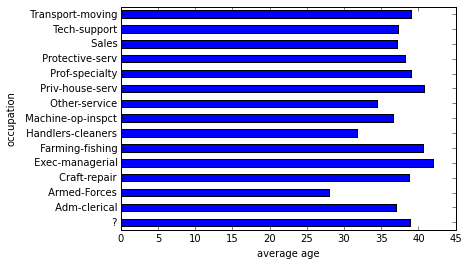

In [10]:
occupationAvgAgePlot = df2.groupby(['occupation'])['age'].mean().plot(kind = 'barh')
occupationAvgAgePlot.set_xlabel("average age")

## 4- Naiive Bayes Classification (Extra Credit)
Attempt this section only if you have completed other sections and have extra time

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

url_train = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_train.csv'
url_test = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_test.csv'

### Instructions
Train a Naiive Bayes classifier using the dataset in "url_train". Each row in the dataset consists of a "Sentence" and a "Tag" which encodes the sentiment. Your classifier should use the words in a sentence as features for that row. For this part simply count the number of occurences of each word in the dictionary (you can accomplish this using CountVectorizer from the scikit learn library if you are using Python). For more information refer to: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


If you are using pandas empty values are by defaul encoded as NaN. scikit learn does not play well with NaN. Make sure that you handle NaNs before you predict


Output: Print the predictions of your NB model for the test dataset

In [12]:
trainRaw = pd.read_csv(url_train)
testRaw = pd.read_csv(url_test)
train = trainRaw.fillna(' ')
test = testRaw.fillna(' ')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
CV = CountVectorizer()

In [14]:
trainY = train['Tag'].map(lambda x: 1 if x == 'Pos' else 0)
trainX = CV.fit_transform(train.Sentence).toarray()
testX = CV.transform(test.Sentence).toarray()
nb = MultinomialNB()
nb.fit(trainX, trainY)
accuracy_score(trainY, nb.predict(trainX))

0.97333333333333338

In [15]:
testRaw['Prediction'] = nb.predict(testX)
testRaw['Prediction'] = testRaw['Prediction'].map(lambda x: 'Pos' if x == 1 else 'Neg')

##### The predictions of your NB model for the test dataset

In [16]:
testRaw

,Sentence,Prediction
0,gain software mouse overall version bad,Pos
1,impressed love,Pos
2,virus version terrible,Pos
3,aware love git account improve security,Pos
4,overall useful to terrible,Pos
5,cloud love control terrible,Pos
6,love version privacy overall,Pos
7,NaN,Pos
8,keyboard impressed gain,Pos
9,keyboard version git control bad,Pos
